In [38]:
import networkx as nx
import pandas as pd
import numpy as np
#import networkx.algorithms.isomorphism as iso
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [97]:
mia_f = open(r"C:\Users\scohendevries\Documents\DATA620\miami-censustracts-2020-1-OnlyWeekends-HourlyAggregate.csv",'rb')
mia_df = pd.read_csv(mia_f,sep=",")
mia_df['city'] = 'Miami'

la_f = open(r"C:\Users\scohendevries\Documents\DATA620\los_angeles-censustracts-2020-1-OnlyWeekends-HourlyAggregate.csv",'rb')
la_df = pd.read_csv(la_f,sep=",")
la_df['city'] = 'Los Angeles'

df = pd.concat([mia_df,la_df])

conditions = [
    (df['hod'] <= 5) | (df['hod'] >= 22),
    (df['hod'] >= 5) & (df['hod'] < 12),
    (df['hod'] >= 12) & (df['hod'] < 17),
    (df['hod'] >= 17) & (df['hod'] < 22)
    ]

# create a list of the values we want to assign for each condition
values = ['night', 'morning', 'afternoon', 'evening']

# create a new column and use np.select to assign values to it using our lists as arguments
df['time_of_day'] = np.select(conditions, values)
df.head(25)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,city,time_of_day
0,312,1117,23,851.38,178.46,835.05,1.21,Miami,night
1,311,1127,23,560.44,229.14,498.80,1.71,Miami,night
2,235,605,20,1753.24,443.96,1713.40,1.22,Miami,evening
3,68,781,11,2036.17,493.58,1988.06,1.23,Miami,morning
4,282,135,20,1045.65,809.25,890.47,1.64,Miami,evening
5,240,784,2,892.69,394.24,838.15,1.38,Miami,night
6,264,315,20,361.22,151.58,334.94,1.46,Miami,evening
7,342,743,10,1092.83,120.25,1086.22,1.12,Miami,morning
8,243,525,20,863.83,259.71,822.31,1.38,Miami,evening
9,299,92,12,860.12,110.74,853.36,1.13,Miami,afternoon


In [20]:
G=nx.from_pandas_edgelist(df, "sourceid", 'dstid', ['mean_travel_time'
                                                    , 'standard_deviation_travel_time'
                                                    , 'geometric_mean_travel_time'
                                                   , 'geometric_standard_deviation_travel_time'
                                                   , 'time_of_day'])

d_centr = nx.degree_centrality(G)

e_centr = nx.eigenvector_centrality(G,weight='mean_travel_time')

In [22]:
M=nx.from_pandas_edgelist(mia_df, "sourceid", 'dstid', ['mean_travel_time'
                                                    , 'standard_deviation_travel_time'
                                                    , 'geometric_mean_travel_time'
                                                   , 'geometric_standard_deviation_travel_time'
                                                       ])

mia_d_centr = nx.degree_centrality(M)

mia_e_centr = nx.eigenvector_centrality(M,weight='mean_travel_time')

In [23]:
LA=nx.from_pandas_edgelist(la_df, "sourceid", 'dstid', ['mean_travel_time'
                                                    , 'standard_deviation_travel_time'
                                                    , 'geometric_mean_travel_time'
                                                   , 'geometric_standard_deviation_travel_time'
                                                       ])

la_d_centr = nx.degree_centrality(LA)

la_e_centr = nx.eigenvector_centrality(LA,weight='mean_travel_time')

In [55]:
def sorted_map(d):
    ms = sorted(d.items(), key=lambda x: x[1], reverse=True)
    return ms

mia_top_e = sorted_map(mia_e_centr)
la_top_e = sorted_map(la_e_centr)

mia_top_d = sorted_map(mia_d_centr)
la_top_d = sorted_map(la_d_centr)

In [96]:
print(len(M))
print([i[1] for i in mia_top_e[0:10]])
print('\n')
print([i[1] for i in mia_top_d[0:10]])
print('\n')
print(min(mia_e_centr.values())
     ,max(mia_e_centr.values())
     )
print('\n')
print(min(mia_d_centr.values())
     ,max(mia_d_centr.values())
     )

1200
[0.07445260198766762, 0.07214181913118772, 0.06836949031194371, 0.06625487680476126, 0.06580193270034906, 0.06531667156505488, 0.06430547675623904, 0.06424897923508684, 0.06341556859384911, 0.06307335446886769]


[0.8632193494578815, 0.8582151793160967, 0.8190158465387822, 0.798999165971643, 0.7789824854045038, 0.76814011676397, 0.76814011676397, 0.762301918265221, 0.762301918265221, 0.7589658048373644]


0.00019468596385817204 0.07445260198766762


0.011676396997497914 0.8632193494578815


In [95]:
print(len(LA))
print([i[1] for i in la_top_e[0:10]])
print('\n')
print([i[1] for i in la_top_d[0:10]])
print('\n')
print(min(la_e_centr.values())
     ,max(la_e_centr.values())
     )
print('\n')
print(min(la_d_centr.values())
     ,max(la_d_centr.values())
     )

2639
[0.0610166857181349, 0.04922874572465428, 0.04911714121346684, 0.048508552874158416, 0.04850561063261624, 0.04712211238181598, 0.046931529923338516, 0.04646847592296493, 0.046060675655422025, 0.0452423543887044]


[0.8677028051554208, 0.821076573161486, 0.7975739196360879, 0.7949203942380592, 0.7926459438968916, 0.7862016679302501, 0.769901440485216, 0.7676269901440486, 0.7661106899166035, 0.7554965883244883]


1.2585807032192346e-08 0.0610166857181349


0.0003790750568612585 0.8677028051554208


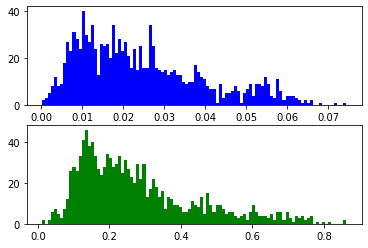

In [90]:
fig, (ax1, ax2) = plt.subplots(2)

mia_hist_e = ax1.hist(mia_e_centr.values(),100, label='Eigenvector Centrality',color='b')
mia_hist_d = ax2.hist(mia_d_centr.values(),100, label='Degree Centrality',color='g')

plt.show()

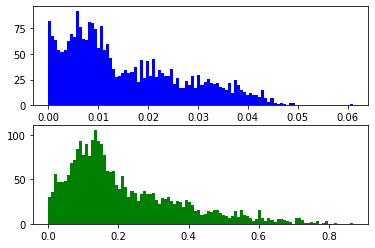

In [89]:
fig, (ax1, ax2) = plt.subplots(2)

la_hist_e = ax1.hist(la_e_centr.values(),100, label='Eigenvector Centrality',color='b')
la_hist_d = ax2.hist(la_d_centr.values(),100, label='Degree Centrality',color='g')

plt.show()